### lecture 1

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [132]:
sns.set_style('whitegrid')
cf.go_offline()

In [133]:
train = pd.read_csv('./dataset/titanic_train.csv')

#### data analysis

In [134]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

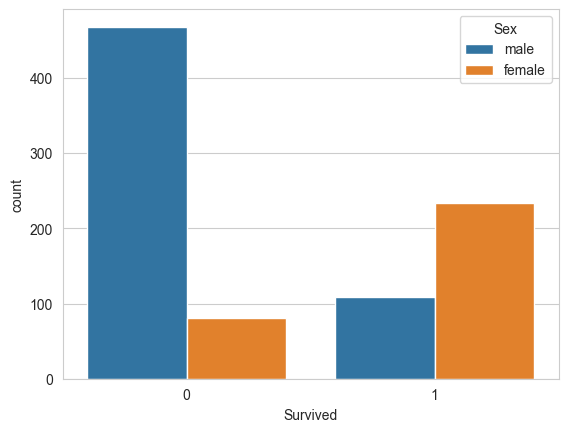

In [135]:
sns.countplot(train,x='Survived',hue='Sex')

it can be seen from the above grapg that the most of the people who survived were female while the ones wo died were males

<Axes: xlabel='Survived', ylabel='count'>

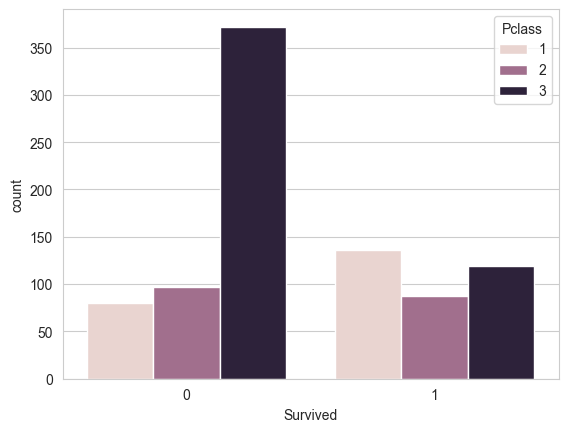

In [136]:
sns.countplot(train,x='Survived',hue='Pclass')

also the ones who died the most were the ones belonging to the last class while the ones who survived the most belonged to the first class

<Axes: xlabel='Age', ylabel='Count'>

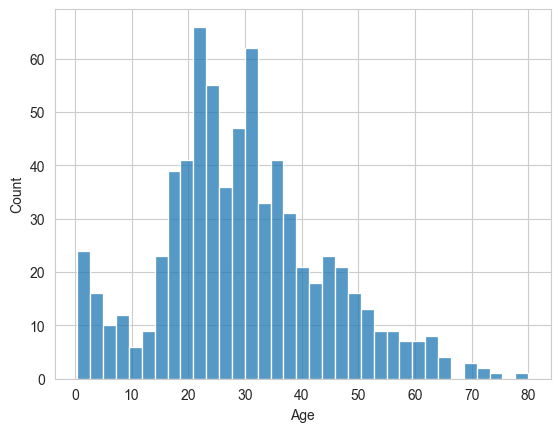

In [137]:
sns.histplot(train['Age'].dropna(),kde=False,bins=35)

another way of creating a hist plot from a dataset...

<Axes: ylabel='Frequency'>

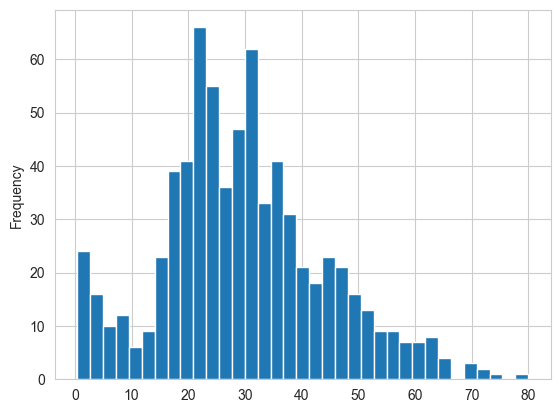

In [138]:
train['Age'].plot.hist(bins=35)

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

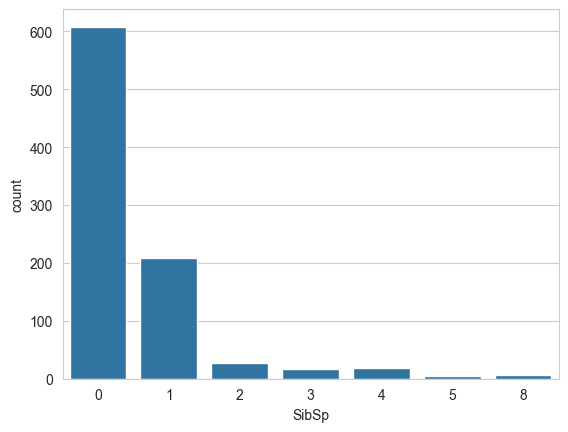

In [140]:
sns.countplot(train,x='SibSp')

<Axes: >

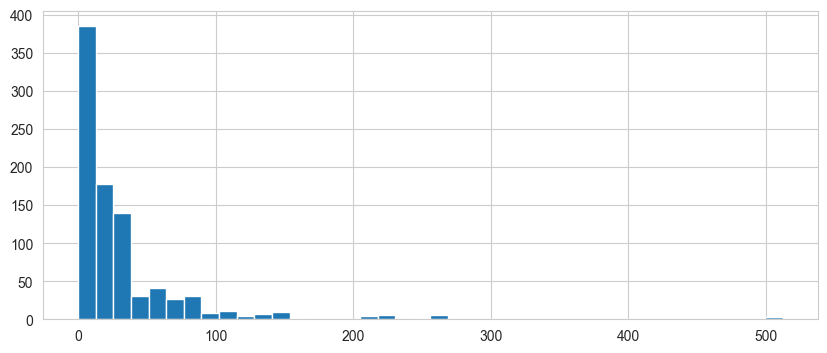

In [141]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [142]:
train['Fare'].iplot(kind='hist',bins=50)

#### data cleaning

in this case every yellow line stands for a true point where true is null, so there are missing values. as we can see cabin contains a lot of missing values and could be dropped

<Axes: >

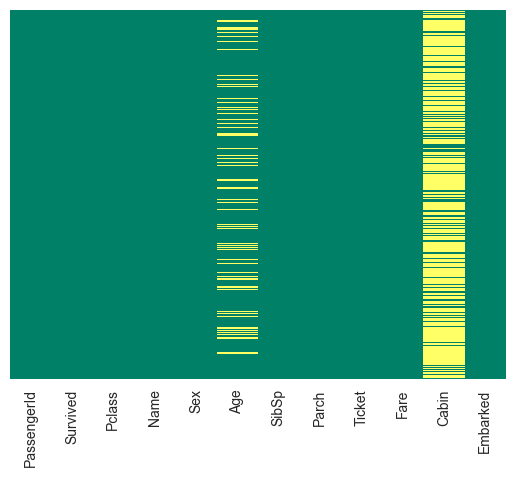

In [143]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

<Axes: xlabel='Pclass', ylabel='Age'>

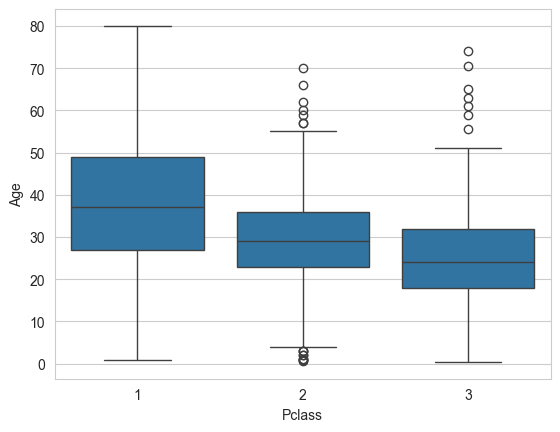

In [144]:
sns.boxplot(train,x='Pclass',y='Age')

In [145]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 # average age in class 1
        elif Pclass == 2:
            return 29 # average age in class 2
        else:
            return 24 # average age in class 3
    else:
        return Age

In [146]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

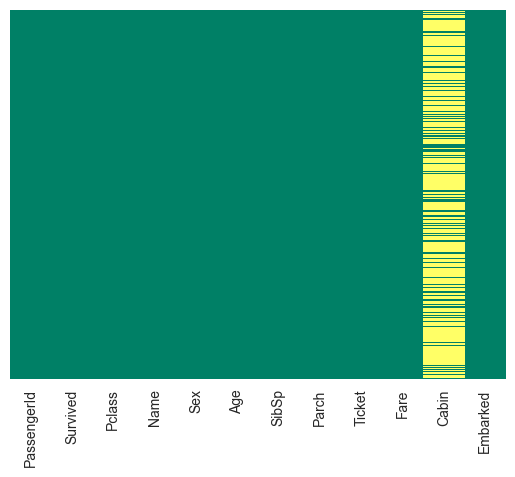

In [147]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

so now we do not have missing values for the 'Age' variable. 'Cabin' instead can be dropped

In [148]:
train.drop('Cabin',axis=1,inplace=True)

In [149]:
train.dropna(inplace=True)

<Axes: >

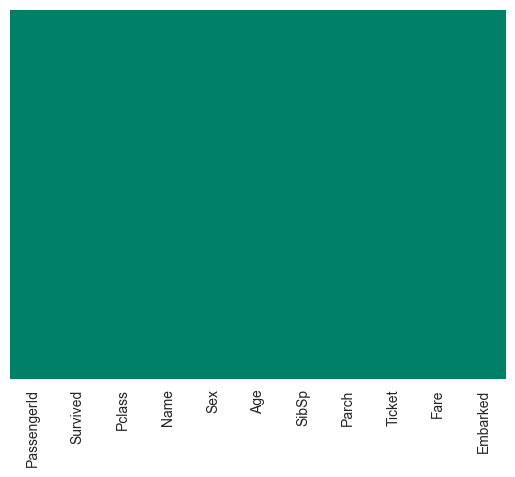

In [150]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='summer')

now nothing is missing

#### categorical features

we are going to encode the strings of the categorical variables in 0 and 1 in order to let the machine learning algorith to understand these variables. also in Sex variable we have a problem of multicollinearity since one category is a perfect prediction of the other

In [151]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [152]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [153]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [154]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [155]:
train = pd.concat([train,sex,embark],axis=1)

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [157]:
train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [160]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


#### logistic regression

In [162]:
X = train.drop('Survived',axis=1)

In [163]:
y = train['Survived']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [169]:
logmodel = LogisticRegression(max_iter=500)

In [170]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

#### predictions

In [171]:
predictions = logmodel.predict(X_test)

In [175]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [177]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)